In [31]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


# Data Cleanup form a strings to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

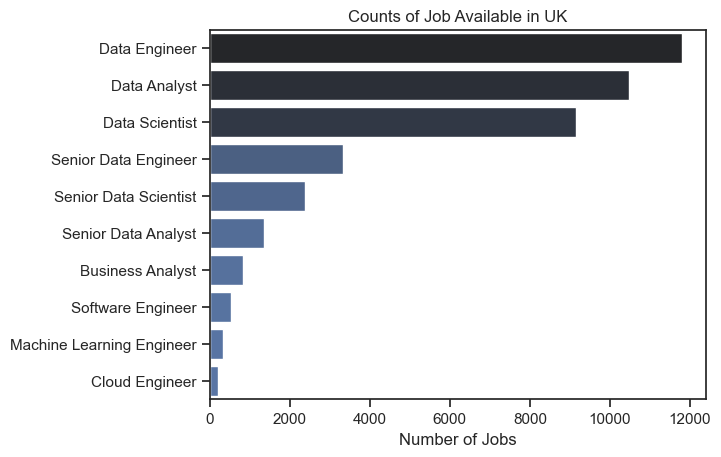

In [32]:
df_UK = df[df['job_country']=='United Kingdom'].copy()

df_UK_count = df_UK['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_UK_count, x='count', y = 'job_title_short', hue='count', palette='dark:b_r',legend=False)
plt.title('Counts of Job Available in UK')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

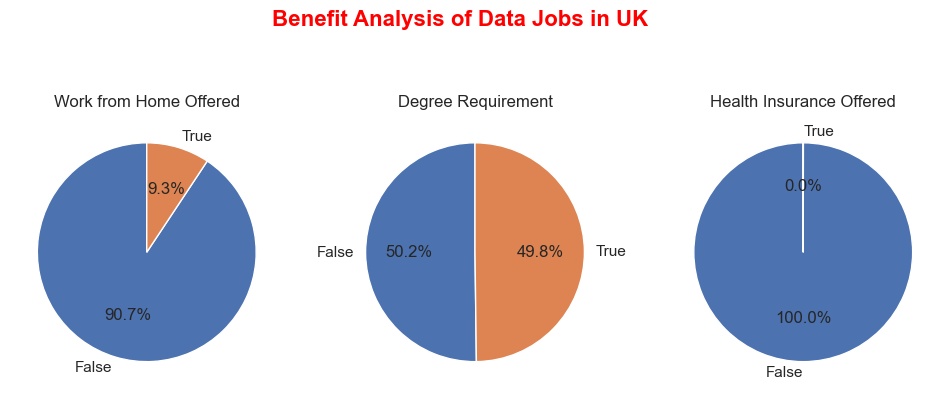

In [33]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_UK[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs in UK', fontsize=16, color='red', fontweight='bold')
plt.show()

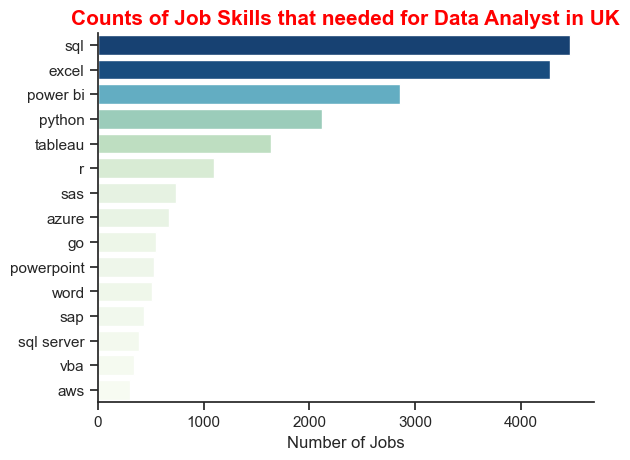

In [40]:
df_UK_DA = df_UK[df_UK['job_title_short'] == 'Data Analyst'].copy()

df_UK_skill = df_UK_DA.explode('job_skills')

df_plot_UK_skill = df_UK_skill['job_skills'].value_counts().to_frame().head(15)

sns.barplot(data=df_plot_UK_skill, x='count', y='job_skills',hue='count', palette='GnBu',legend=False)
sns.despine()
plt.title('Counts of Job Skills that needed for Data Analyst in UK', color='red', fontsize=15, fontweight='bold')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()